In [37]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
df = pd.read_csv("actor-metrics.csv")
df.head()


,year,film,actor,characters,imdb,gender,race,race_simple,words,sentences
0,1989,born-on-the-fourth-of-july,Dale Dye,COLONEL,http://www.imdb.com/name/nm0245653/,male,White/Caucasian,White,216.0,15.0
1,1989,born-on-the-fourth-of-july,David Warshofsky,LIEUTENANT,http://www.imdb.com/name/nm0913175/,male,White/Caucasian,White,290.0,40.0
2,1989,born-on-the-fourth-of-july,Frank Whaley,TIMMY,http://www.imdb.com/name/nm0001844/,male,White/Caucasian,White,104.0,14.0
3,1989,born-on-the-fourth-of-july,Jerry Levine,STEVE,http://www.imdb.com/name/nm0505842/,male,White/Caucasian,White,300.0,35.0
4,1989,born-on-the-fourth-of-july,John F. Kennedy,KENNEDY,NaN,male,White/Caucasian,White,217.0,5.0


,film,race_simple
0,born-on-the-fourth-of-july,White
1,born-on-the-fourth-of-july,White
2,born-on-the-fourth-of-july,White
3,born-on-the-fourth-of-july,White
4,born-on-the-fourth-of-july,White


In [53]:
subset = df[["year","race_simple"]]
#subset.head()
w_subset = subset[subset.race_simple == "White"]
w_subset.head()
p_subset=subset[subset.race_simple == "POC"]
p_subset.tail()

,year,race_simple
225,2017,POC
244,2017,POC
250,2017,POC
251,2017,POC
257,2017,POC


0.08
0.11
0.13


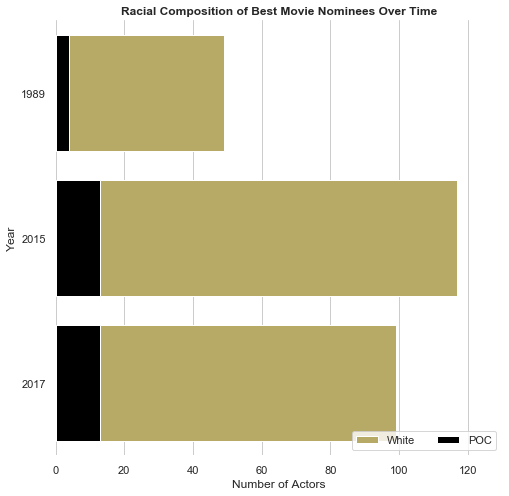

In [149]:
df_1989=df[df.year == 1989]
df_1989=df_1989[["race_simple"]]
df_1989_w=df_1989[df_1989.race_simple == "White"]
df_1989_p=df_1989[df_1989.race_simple == "POC"]
df_1989_fraction=round(df_1989_p.size/(df_1989_p.size+df_1989_w.size),2)

df_2015=df[df.year == 2015]
df_2015=df_2015[["race_simple"]]
df_2015_w=df_2015[df_2015.race_simple == "White"]
df_2015_p=df_2015[df_2015.race_simple == "POC"]
df_2015_fraction=round(df_2015_p.size/(df_2015_p.size+df_2015_w.size),2)

df_2017=df[df.year == 2017]
df_2017=df_2017[["race_simple"]]
df_2017_w=df_2017[df_2017.race_simple == "White"]
df_2017_p=df_2017[df_2017.race_simple == "POC"]
df_2017_fraction=round(df_2017_p.size/(df_2017_p.size+df_2017_w.size),2)

print(df_1989_fraction)
print(df_2015_fraction)
print(df_2017_fraction)


graph_data=pd.DataFrame({'Year':[1989,2015,2017],'Totals':[(df_1989_w.size+df_1989_p.size), 
(df_2015_w.size+df_2015_p.size),(df_2017_w.size+df_2017_p.size)],
'POC':[df_1989_p.size,df_2015_p.size,df_2017_p.size]})


sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))



sns.set_color_codes("pastel")
sns.barplot(y="Year",x= 'Totals', data=graph_data,
            label="White", color="#C5B358",orient='h')

sns.set_color_codes("muted")
sns.barplot( y="Year",x='POC', data=graph_data,
            label="POC", color="black",orient='h')

ax.legend(ncol=3, loc="lower right", frameon=True)
ax.set(xlim=(0, 130), ylabel="Year", xlabel="Number of Actors")
plt.title('Racial Composition of Best Movie Nominees Over Time', weight='bold')

sns.despine(left=True, bottom=True)

